In [125]:
%reset

import pandas as pd
df_pref = pd.read_csv("out2_preferences.csv", index_col=0)
df_plan_act = pd.read_csv("out2_plan_activities.csv", index_col=0)
df_plan_per = pd.read_csv("out2_plan_persons.csv", index_col=0)
list_pers = df_plan_per.index.tolist()

print(df_pref)

df_happyness = pd.DataFrame()
for pers in list_pers:
    print("===")
    df_pref_pers = df_pref.loc[pers, :]
    print("df_pref_pers =\n", df_pref_pers)



    print("= clean unplanned persons : ", pers)
    games_serie_person_planned = df_plan_per.loc[pers, :]
    print("games_serie_person_planned =\n", games_serie_person_planned)

    games_serie_person_not_planned = df_pref_pers[~df_pref_pers.index.isin(games_serie_person_planned)].index
    print("games_serie_person_not_planned =\n", games_serie_person_not_planned)

    df_pref.loc[pers, games_serie_person_not_planned] = df_pref.loc[pers, games_serie_person_not_planned].multiply(-1, fill_value=0)


df_happyness = df_pref.sum(axis=1)
print(df_pref)
print()
print(df_happyness)


# print(df_pref)
# print(df_plan_act)


#df_pref_from_games_planned = df_pref[df_pref.columns[df_pref.columns.isin(games_planned)]]
#print(df_pref[df_pref.columns[~df_pref.columns.isin(games_planned)]])

#print(df_pref_from_games_planned)
#df_pref_from_games_planned[df_pref_from_games_planned.index].sum(axis=1)

       toto1  toto2  toto3  toto4  toto5  toto6  toto7  toto8  toto9
Alice      0  102.0     10     10      0    100    100      0    100
Bob      100  101.0    500    500    100    100    100     50    100
Tara     102    0.0    100    800    100    101    100      2    105
Leo       10    NaN      0      0    300      0    100    300    100
Hans    1000   10.0      1      1     10    100    100     10    100
Uri       10  103.0    100    100    250     50    100     10    100
Lara     110   99.0    102    100    100     99      0     10    100
Kenny   1000  100.0    101    100    100    500    100     10      0
===
df_pref_pers =
 toto1      0.0
toto2    102.0
toto3     10.0
toto4     10.0
toto5      0.0
toto6    100.0
toto7    100.0
toto8      0.0
toto9    100.0
Name: Alice, dtype: float64
= clean unplanned persons :  Alice
games_serie_person_planned =
 0    toto1
1    toto5
2    toto6
Name: Alice, dtype: object
games_serie_person_not_planned =
 Index(['toto2', 'toto3', 'toto4', 'to

[4, 5]


KEKwin= 64.31999999999996 %
KEKlose= 35.06666666666665 %
After games choice : 15.0 %


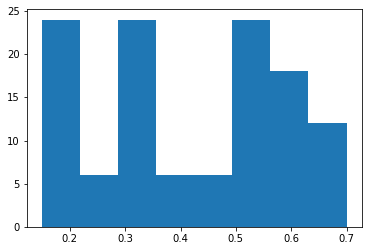

In [34]:
import numpy as np
import matplotlib.pyplot as plt

games       = ['W3', 'Worms', 'Valheim', 'Trials', 'Quake', 'Farming']
KEKvsFUTULU = [0.7 , 0.5    , 0.5      , 0.7     , 0      , 0.3      ]

def will_win(i, j, k, inverse=False):
    p0 = KEKvsFUTULU[i]*KEKvsFUTULU[j]
    p1 = (1-KEKvsFUTULU[i])*KEKvsFUTULU[j]*KEKvsFUTULU[k]
    p2 = KEKvsFUTULU[i]*(1-KEKvsFUTULU[j])*KEKvsFUTULU[k]

    if not inverse:
        return p0+p1+p2
    else:
        return 3-p0-p1-p2

def gen_comb(nb_id):
    comb = []
    for i in range(nb_id):
        for j in range(nb_id):
            if j==i:
                continue 
            for k in range(nb_id):
                if k==i or k==j:
                    continue 
                comb.append([i, j, k])
    return comb

comb_arr = gen_comb(len(KEKvsFUTULU))

result = []
for comb in comb_arr:
    result.append(will_win(*comb))

result.sort()
hist_result = np.histogram(result, bins=10)

plt.hist(result, bins='auto')

more_than_half = [x for x in result if x > 0.5]
print("KEKwin=", sum(more_than_half)/len(more_than_half)*100, "%")
less_than_half = [x for x in result if x <= 0.5]
print("KEKlose=", sum(less_than_half)/len(less_than_half)*100, "%")

print("After games choice :", will_win(4,5,2)*100, "%")